# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using a train-test split.

## Objectives

You will be able to:

* Perform a train-test split
* Prepare training and testing data for modeling
* Compare training and testing errors to determine if model is over or underfitting

## Let's Use Our Ames Housing Data Again!

We included the code to load the data below.

In [28]:
# Run this cell without changes
import pandas as pd
import numpy as np
ames = pd.read_csv('ames.csv', index_col=0)
ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Perform a Train-Test Split

Use `train_test_split` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) with the default split size. At the end you should have `X_train`, `X_test`, `y_train`, and `y_test` variables, where `y` represents `SalePrice` and `X` represents all other columns.

In [20]:
# Your code here: split the data into training and test sets
from sklearn.model_selection import train_test_split
y = ames[['SalePrice']]
X = ames.drop(['SalePrice'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=61012)


## Prepare Both Sets for Modeling

This code is completed for you and should work as long as the correct variables were created.

In [21]:
# Run this cell without changes
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

In [22]:
X_test.head()

,0,1,2,0,1,2,3,4,5,6,7
Id,,,,,,,,,,,
1160,9.118225,6.849066,7.536897,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1266,8.225503,6.569481,7.280697,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
746,9.100860,7.069023,7.906547,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
164,8.612503,6.782192,6.782192,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1320,9.231613,6.854355,6.854355,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


## Fit a Linear Regression on the Training Data

In [5]:
# Your code here: import the linear regression model class, initialize a model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [6]:
# Your code here: fit the model to train data
linreg.fit(X_train, y_train)

LinearRegression()

## Evaluate and Validate Model

### Generate Predictions on Training and Test Sets

In [8]:
# Your code here: generate predictions for both sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

### Calculate the Mean Squared Error (MSE)

You can use `mean_squared_error` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

In [9]:
# Your code here: calculate training and test MSE
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print(f'Train MSE:{mse_train}')
print(f'Test MSE:{mse_test}')

Train MSE:1701560285.0155766
Test MSE:2209819410.937776


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

In [39]:
ames = pd.read_csv('ames.csv', index_col=0)[['SalePrice','LotArea', '1stFlrSF', 'GrLivArea','BldgType', 'KitchenQual', 'Street']]
ames.head()

,SalePrice,LotArea,1stFlrSF,GrLivArea,BldgType,KitchenQual,Street
Id,,,,,,,
1,208500,8450,856,1710,1Fam,Gd,Pave
2,181500,9600,1262,1262,1Fam,TA,Pave
3,223500,11250,920,1786,1Fam,Gd,Pave
4,140000,9550,961,1717,1Fam,Gd,Pave
5,250000,14260,1145,2198,1Fam,Gd,Pave


## Level Up: Evaluate the Effect of Train-Test Split Size

Iterate over a range of train-test split sizes from .5 to .9. For each of these, generate a new train/test split sample. Preprocess both sets of data. Fit a model to the training sample and calculate both the training error and the test error (MSE) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

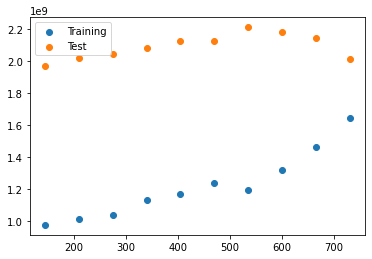

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

error_v_size = []
ames = pd.read_csv('ames.csv', index_col=0)[[
    'SalePrice', 'LotArea', '1stFlrSF', 'GrLivArea', 'BldgType', 'KitchenQual',
    'Street'
]]
y = ames[['SalePrice']]
X = ames.drop(['SalePrice'], axis=1)
continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']
for size in np.linspace(0.5, 0.9,10):
    # Set up Train-Test based on test_size
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=size,
                                                        random_state=42)
    # Preprocess both sets of data.
    log_transformer = FunctionTransformer(np.log, validate=True)
    ohe = OneHotEncoder(drop='first', sparse=False)
    log_transformer.fit(X_train[continuous])
    ohe.fit(X_train[categoricals])
    X_train = pd.concat([
        pd.DataFrame(log_transformer.transform(X_train[continuous]),
                     index=X_train.index),
        pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
    ],
                        axis=1)
    X_test = pd.concat([
        pd.DataFrame(log_transformer.transform(X_test[continuous]),
                     index=X_test.index),
        pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
    ],
                       axis=1)
    # Fit a model to the training sample
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    # Calculate both the training error and the test error (MSE) for each of these splits.
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    mse_train = mean_squared_error(y_train, y_hat_train)
    mse_test = mean_squared_error(y_test, y_hat_test)
    error_v_size.append([mse_train, mse_test, len(X_train)])

# Plot these two curves (train error vs. training size and test error vs. training size) on a graph.
df = pd.DataFrame(error_v_size,
                  columns=['mse_train', 'mse_test', 'training_size'])

fig, ax = plt.subplots()
ax.scatter(df['training_size'], df['mse_train'], color='tab:blue', label='Training')
ax.scatter(df['training_size'], df['mse_test'], color='tab:orange', label='Test')
ax.legend()
plt.show()

### Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

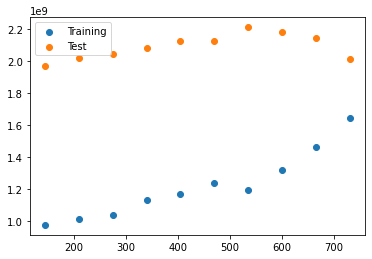

In [54]:
error_v_size = []
ames = pd.read_csv('ames.csv', index_col=0)[[
    'SalePrice', 'LotArea', '1stFlrSF', 'GrLivArea', 'BldgType', 'KitchenQual',
    'Street'
]]
y = ames[['SalePrice']]
X = ames.drop(['SalePrice'], axis=1)
continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']
for size in np.linspace(0.5, 0.9,10):
    for loop in range(10):
        train_mses = []
        test_mses = []
    
        # Set up Train-Test based on test_size
        X_train, X_test, y_train, y_test = train_test_split(X,
                                                            y,
                                                            test_size=size,
                                                            random_state=42)
        # Preprocess both sets of data.
        log_transformer = FunctionTransformer(np.log, validate=True)
        ohe = OneHotEncoder(drop='first', sparse=False)
        log_transformer.fit(X_train[continuous])
        ohe.fit(X_train[categoricals])
        X_train = pd.concat([
            pd.DataFrame(log_transformer.transform(X_train[continuous]),
                         index=X_train.index),
            pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
        ],
                            axis=1)
        X_test = pd.concat([
            pd.DataFrame(log_transformer.transform(X_test[continuous]),
                         index=X_test.index),
            pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
        ],
                           axis=1)
        # Fit a model to the training sample
        linreg = LinearRegression()
        linreg.fit(X_train, y_train)
        # Calculate both the training error and the test error (MSE) for each of these splits.
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        mse_train = mean_squared_error(y_train, y_hat_train)
        mse_test = mean_squared_error(y_test, y_hat_test)
        train_mses.append(mse_train)
        test_mses.append(mse_test)
    train_avg = np.array(train_mses).mean()
    test_avg = np.array(test_mses).mean()  
    error_v_size.append([train_avg, test_avg, len(X_train)])

# Plot these two curves (train error vs. training size and test error vs. training size) on a graph.
df = pd.DataFrame(error_v_size,
                  columns=['mse_train', 'mse_test', 'training_size'])

fig, ax = plt.subplots()
ax.scatter(df['training_size'], df['mse_train'], color='tab:blue', label='Training')
ax.scatter(df['training_size'], df['mse_test'], color='tab:orange', label='Test')
ax.legend()
plt.show()

What's happening here? Evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.